# 03_04: Doing math with NumPy arrays

In [1]:
import math
import collections
import dataclasses
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(0.0, 5.0*math.pi, 128)  # extrema are included!
x

array([ 0.        ,  0.12368475,  0.2473695 ,  0.37105425,  0.494739  ,
        0.61842375,  0.7421085 ,  0.86579325,  0.989478  ,  1.11316275,
        1.2368475 ,  1.36053225,  1.484217  ,  1.60790175,  1.7315865 ,
        1.85527125,  1.978956  ,  2.10264075,  2.2263255 ,  2.35001025,
        2.473695  ,  2.59737975,  2.7210645 ,  2.84474925,  2.968434  ,
        3.09211875,  3.2158035 ,  3.33948825,  3.463173  ,  3.58685775,
        3.7105425 ,  3.83422725,  3.957912  ,  4.08159675,  4.2052815 ,
        4.32896625,  4.45265101,  4.57633576,  4.70002051,  4.82370526,
        4.94739001,  5.07107476,  5.19475951,  5.31844426,  5.44212901,
        5.56581376,  5.68949851,  5.81318326,  5.93686801,  6.06055276,
        6.18423751,  6.30792226,  6.43160701,  6.55529176,  6.67897651,
        6.80266126,  6.92634601,  7.05003076,  7.17371551,  7.29740026,
        7.42108501,  7.54476976,  7.66845451,  7.79213926,  7.91582401,
        8.03950876,  8.16319351,  8.28687826,  8.41056301,  8.53

In [3]:
math.sin(x)

TypeError: only length-1 arrays can be converted to Python scalars

In [5]:
sinx = np.sin(x)
sinx

array([ 0.00000000e+00,  1.23369638e-01,  2.44854382e-01,  3.62598137e-01,
        4.74801964e-01,  5.79751564e-01,  6.75843473e-01,  7.61609559e-01,
        8.35739449e-01,  8.97100557e-01,  9.44755382e-01,  9.77975832e-01,
        9.96254351e-01,  9.99311673e-01,  9.87101086e-01,  9.59809149e-01,
        9.17852840e-01,  8.61873185e-01,  7.92725465e-01,  7.11466148e-01,
        6.19336749e-01,  5.17744860e-01,  4.08242645e-01,  2.92503125e-01,
        1.72294617e-01,  4.94537199e-02, -7.41427526e-02, -1.96606441e-01,
       -3.16066292e-01, -4.30697148e-01, -5.38747630e-01, -6.38566896e-01,
       -7.28629866e-01, -8.07560519e-01, -8.74152919e-01, -9.27389639e-01,
       -9.66457306e-01, -9.90759028e-01, -9.99923511e-01, -9.93810738e-01,
       -9.72514103e-01, -9.36358983e-01, -8.85897772e-01, -8.21901439e-01,
       -7.45347746e-01, -6.57406313e-01, -5.59420747e-01, -4.52888114e-01,
       -3.39436063e-01, -2.20797963e-01, -9.87864183e-02,  2.47344273e-02,
        1.47877370e-01,  

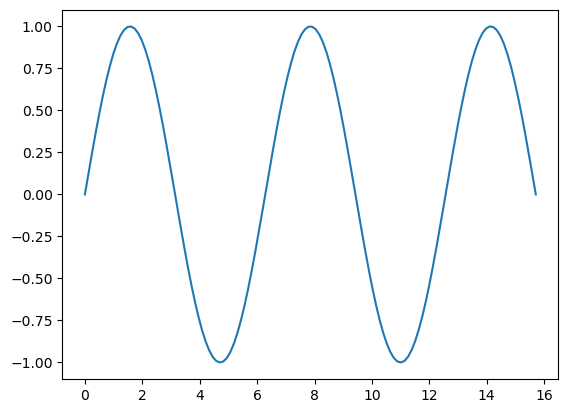

In [6]:
plt.plot(x, sinx)

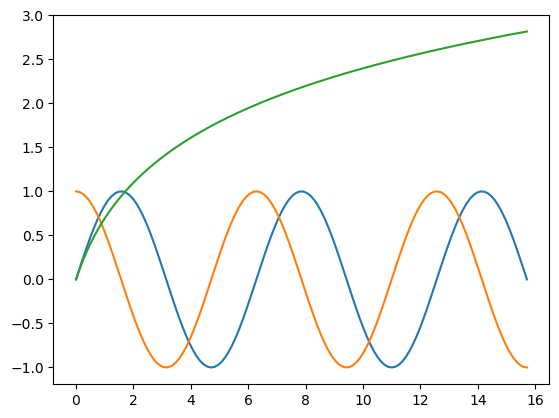

In [7]:
plt.plot(x, sinx)
plt.plot(x, np.cos(x))
plt.plot(x, np.log(1.0 + x))

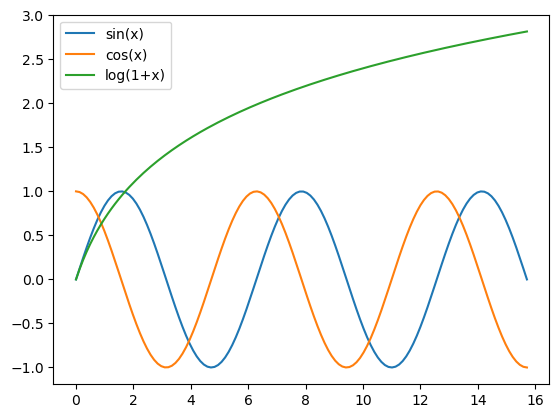

In [8]:
plt.plot(x, sinx, label='sin(x)')
plt.plot(x, np.cos(x), label='cos(x)')
plt.plot(x, np.log(1 + x), label='log(1+x)')

plt.legend()

In [9]:
cosx = np.cos(x)

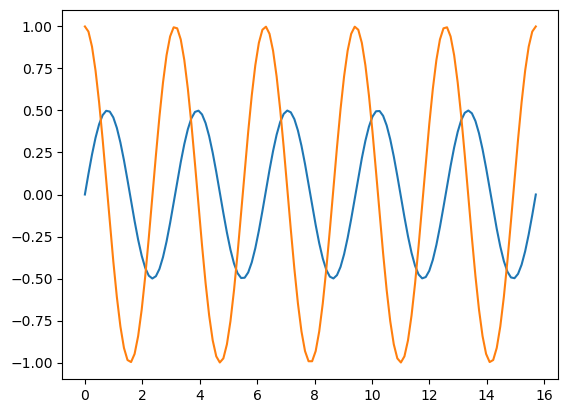

In [10]:
y = sinx * cosx
z = cosx**2 - sinx**2  # the power operator in Python is **, not ^  

plt.plot(x, y)
plt.plot(x, z)

In [11]:
x + y[16:32]

ValueError: operands could not be broadcast together with shapes (128,) (16,) 

In [12]:
w = sinx + 1.5

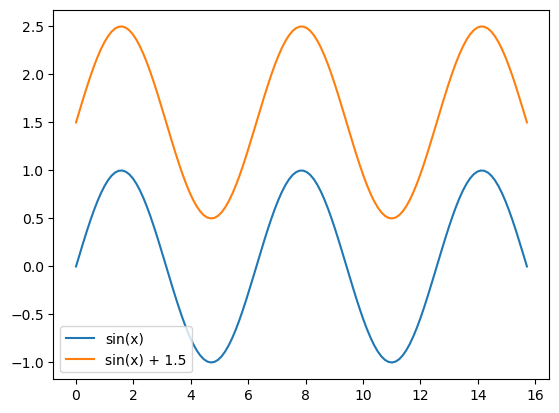

In [13]:
plt.plot(x, sinx, label='sin(x)')
plt.plot(x, w, label='sin(x) + 1.5')
plt.legend()

In [14]:
monalisa_bw = np.loadtxt('monalisa.txt')

In [15]:
monalisa_bw.shape

(200, 134)

In [16]:
xgrad = np.linspace(0.0, 1.0, 134)

In [17]:
monalisa_xgrad = monalisa_bw * xgrad

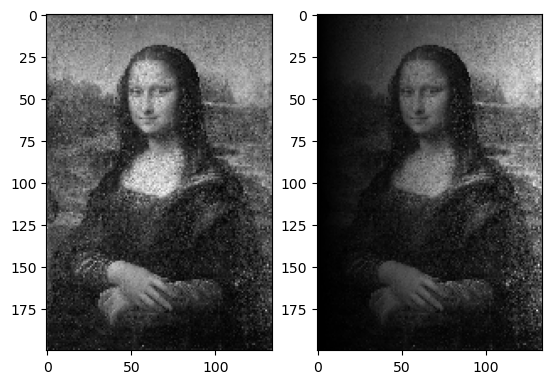

In [18]:
plt.subplot(1, 2, 1); plt.imshow(monalisa_bw, cmap='gray')
plt.subplot(1, 2, 2); plt.imshow(monalisa_xgrad, cmap='gray')

In [19]:
ygrad = np.linspace(0.0, 1.0, 200)

In [20]:
monalisa_ygrad = ygrad * monalisa_bw

ValueError: operands could not be broadcast together with shapes (200,) (200,134) 

In [21]:
ygrad_2d = ygrad[:, np.newaxis]

In [22]:
ygrad_2d.shape

(200, 1)

In [23]:
monalisa_ygrad = monalisa_bw * ygrad_2d

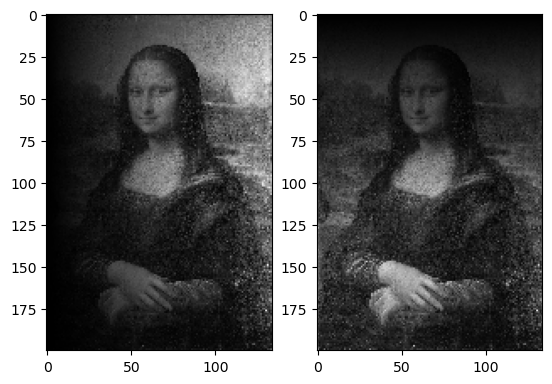

In [24]:
plt.subplot(1, 2, 1); plt.imshow(monalisa_xgrad, cmap='gray')
plt.subplot(1, 2, 2); plt.imshow(monalisa_ygrad, cmap='gray')

In [25]:
np.array([0.0, 1.0, 2.0]) @ np.array([-1.0, -2.0, -3.0])  # same as np.dot()

np.float64(-8.0)

In [26]:
np.array([0.0, 1.0, 2.0]) * np.array([-1.0, -2.0, -3.0])

array([-0., -2., -6.])

In [27]:
np.array([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0]]) @ np.array([10.0, 20.0, 30.0])
# shapes (2,3) and (3,)

array([ 80., 260.])

In [28]:
np.array([100.0, 200.0]) @ np.array([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0]])
# shapes (2,) and (2,3)

array([ 600.,  900., 1200.])

In [29]:
np.array([[0.0, 1.0, 2.0], [3.0, 4.0, 5.0]]) @ np.array([[10.0, 20.0], [30.0, 40.0], [50.0, 60.0]])
# shapes (2,3) and (3,2)

array([[130., 160.],
       [400., 520.]])